In [11]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

%matplotlib inline

In [12]:
ufc_df = pd.read_csv('Bantamweight.csv')
ufc_df.head()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,8,-280.0,225,35.714286,225.000000,0,False,3,1,0,...,-2.80,0.0,-0.69,2,165.0,450.0,1400.0,2000.0,150.0,600.0
1,10,-300.0,235,33.333333,235.000000,0,False,3,2,0,...,-0.50,0.0,-0.39,2,250.0,600.0,650.0,900.0,130.0,550.0
2,16,245.0,-310,245.000000,32.258065,1,False,3,0,6,...,0.92,-0.1,6.41,0,500.0,100.0,1200.0,550.0,600.0,400.0
3,28,170.0,-200,170.000000,50.000000,0,False,3,0,2,...,1.27,0.1,4.05,2,330.0,140.0,800.0,700.0,1000.0,330.0
4,33,-630.0,450,15.873016,450.000000,0,False,3,1,0,...,-1.66,2.2,-2.43,2,215.0,800.0,400.0,1600.0,100.0,1800.0


In [13]:
#GET RID OF UNAMED COLUMN
ufc_df = ufc_df.drop(['Unnamed: 0'], axis = 1)
ufc_df

,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,...,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-280.0,225,35.714286,225.000000,0,False,3,1,0,0,...,-2.800000,0.000000,-0.690000,2,165.0,450.0,1400.0,2000.0,150.0,600.0
1,-300.0,235,33.333333,235.000000,0,False,3,2,0,0,...,-0.500000,0.000000,-0.390000,2,250.0,600.0,650.0,900.0,130.0,550.0
2,245.0,-310,245.000000,32.258065,1,False,3,0,6,0,...,0.920000,-0.100000,6.410000,0,500.0,100.0,1200.0,550.0,600.0,400.0
3,170.0,-200,170.000000,50.000000,0,False,3,0,2,0,...,1.270000,0.100000,4.050000,2,330.0,140.0,800.0,700.0,1000.0,330.0
4,-630.0,450,15.873016,450.000000,0,False,3,1,0,0,...,-1.660000,2.200000,-2.430000,2,215.0,800.0,400.0,1600.0,100.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,275.0,-305,275.000000,32.786885,1,False,3,1,0,0,...,11.000000,0.666667,0.000000,2,785.0,183.0,680.0,1180.0,650.0,155.0
315,150.0,-160,150.000000,62.500000,1,True,5,0,3,0,...,17.333333,0.000000,0.666667,2,328.0,248.0,450.0,370.0,893.0,469.0
316,-115.0,105,86.956522,105.000000,1,False,3,0,2,0,...,32.500000,-1.000000,0.250000,2,245.0,175.0,474.0,1050.0,515.0,750.0
317,150.0,-160,150.000000,62.500000,0,False,3,1,0,0,...,25.833333,0.000000,1.500000,2,315.0,154.0,1200.0,365.0,575.0,706.0


## Prepare the Data

In [14]:
# Selecting data correponding to Input Features X and Outcome y
X = ufc_df.drop(columns=['Winner'])
y = ufc_df['Winner']


# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
test_X.to_csv('bantamweight_test_x.csv',index=False)

In [ ]:
test_y.to_csv('bantamweight_test_y.csv',index=False)

# (A) Implementing AdaBoost for Classification

## Hyperparameters of AdaBoost

In [15]:
# Define your model
classifier = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

# Start with an initial guess for parameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

pprint(random_grid)

{'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0,
                   1.1,
                   1.2000000000000002,
                   1.3000000000000003,
                   1.4000000000000001,
                   1.5000000000000002,
                   1.6,
                   1.7000000000000002,
                   1.8000000000000003,
                   1.9000000000000001,
                   2.0],
 'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500]}


In [16]:
# Creating stratified folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [17]:
# Call RandomizedSearchCV()
random_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

# Fit the model
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   54.2s


Training time: 72.07448649406433s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


In [18]:
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)

Initial score:  0.5935107949980212
Initial parameters:  {'n_estimators': 60, 'learning_rate': 1.2000000000000002}


In [19]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [400, 420, 440, 460, 480, 500],
              'learning_rate': [1.15, 1.20, 1.25]
}

pprint(param_grid)

{'learning_rate': [1.15, 1.2, 1.25],
 'n_estimators': [400, 420, 440, 460, 480, 500]}


In [20]:
# Call GridSearchCV()
grid_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 


# Fit the model
start = time.time()            # Start Time
grid_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.4s finished


Training time: 21.42065739631653s


In [21]:
print('Improved score: ', grid_cv.best_score_)
print('Improved parameters: ', grid_cv.best_params_)

Improved score:  0.5388134514206298
Improved parameters:  {'learning_rate': 1.15, 'n_estimators': 400}


### Analyzing the performance of each stump in the ensemble

**Total Error of each stump**: Sum of weights associated with incorrectly classified instances

In [22]:
# Error of each stump
grid_cv.best_estimator_.estimator_errors_

array([0.35426009, 0.29483349, 0.39000338, 0.44363782, 0.45401245,
       0.45921826, 0.42716569, 0.40626073, 0.39434531, 0.42179268,
       0.41232438, 0.46112061, 0.44856882, 0.42946167, 0.43538185,
       0.46338045, 0.4379093 , 0.43733052, 0.40039045, 0.4442652 ,
       0.46562191, 0.4417801 , 0.42244859, 0.43943419, 0.39749451,
       0.4137204 , 0.42305388, 0.40487746, 0.42284012, 0.42608739,
       0.40630305, 0.44756896, 0.41584044, 0.41346641, 0.41534814,
       0.41285978, 0.43878734, 0.44579479, 0.47172112, 0.46544717,
       0.44727152, 0.4522505 , 0.4535483 , 0.44825109, 0.42317187,
       0.47461605, 0.41296385, 0.42814936, 0.41685634, 0.44708515,
       0.44180678, 0.42317712, 0.44847752, 0.41918918, 0.46735747,
       0.46042199, 0.44117345, 0.45415773, 0.45451428, 0.43906243,
       0.43386463, 0.42630986, 0.42214212, 0.42923533, 0.44621683,
       0.44313722, 0.41961484, 0.44343847, 0.42016161, 0.41786976,
       0.45282638, 0.44038774, 0.46681222, 0.46318515, 0.46693

In [23]:
# Stump Weightage
grid_cv.best_estimator_.estimator_weights_

array([0.69042026, 1.00282668, 0.51439269, 0.26037264, 0.21214229,
       0.18801368, 0.33743821, 0.43636191, 0.49344553, 0.36273137,
       0.40751945, 0.17920696, 0.23742317, 0.32665504, 0.29891512,
       0.16875209, 0.28709913, 0.28980363, 0.46441427, 0.25744997,
       0.15838914, 0.26903185, 0.35963914, 0.27997749, 0.47830301,
       0.4008974 , 0.35678675, 0.44296029, 0.35779394, 0.34250759,
       0.43616015, 0.24207268, 0.39085343, 0.40210172, 0.39318441,
       0.404979  , 0.28299777, 0.25032777, 0.13022181, 0.15919675,
       0.24345621, 0.22031912, 0.21429576, 0.23890047, 0.35623082,
       0.11686664, 0.40448528, 0.33281657, 0.38604572, 0.24432318,
       0.26890742, 0.35620612, 0.23784763, 0.37501819, 0.15036952,
       0.18244054, 0.2718612 , 0.2114683 , 0.20981441, 0.28171321,
       0.30601575, 0.34146141, 0.36108381, 0.32771743, 0.24836344,
       0.26270528, 0.37300793, 0.26130148, 0.37042648, 0.38125308,
       0.21764598, 0.27552689, 0.15288857, 0.16965534, 0.15231

### Make a Pickle File

In [24]:
import pickle

filename = 'bantamweight_boosting_pickle.sav'
pickle.dump(grid_cv, open(filename, 'wb'))

filename = 'bantamweight_boosting_pickle.sav'
loaded_model = pickle.load(open(filename, 'rb'))

**Making predictions on test set**

In [25]:
# Predictions on test set
y_pred = grid_cv.predict(test_X)

# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       0.63      0.84      0.72        56
           1       0.57      0.30      0.39        40

    accuracy                           0.61        96
   macro avg       0.60      0.57      0.56        96
weighted avg       0.60      0.61      0.58        96



**Generating Confusion Matrix**

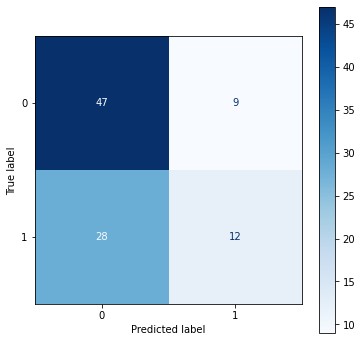

In [26]:
# Specifying figure size
fig, ax = plt.subplots(figsize=(6, 6)) 

# Generating confusion matrix
plot_confusion_matrix(grid_cv, test_X, test_y,
                      cmap = plt.cm.Blues,
                      values_format = '',
                      ax = ax);

**Estimating Prediction Probabilites**

In [27]:
# Getting prediction probabilites
prob = grid_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Prob. of 0','Prob. of 1']] = pd.DataFrame(prob.tolist(), index = result.index)

# Saving dataframe as a csv file
#result.to_csv('Prediction Results.csv', index = False)

**Feature Importance**

In [28]:
# Storing importance values from the best fit model
importance = grid_cv.best_estimator_.feature_importances_

In [29]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

,Feature,Importance
0,r_ko_odds,0.046898
1,r_sub_odds,0.045413
2,B_avg_SIG_STR_landed,0.044848
3,R_avg_SIG_STR_landed,0.043093
4,R_age,0.041644
...,...,...
71,R_win_by_Decision_Split,0.000000
72,R_win_by_Decision_Unanimous,0.000000
73,R_win_by_KO/TKO,0.000000
74,R_win_by_Submission,0.000000


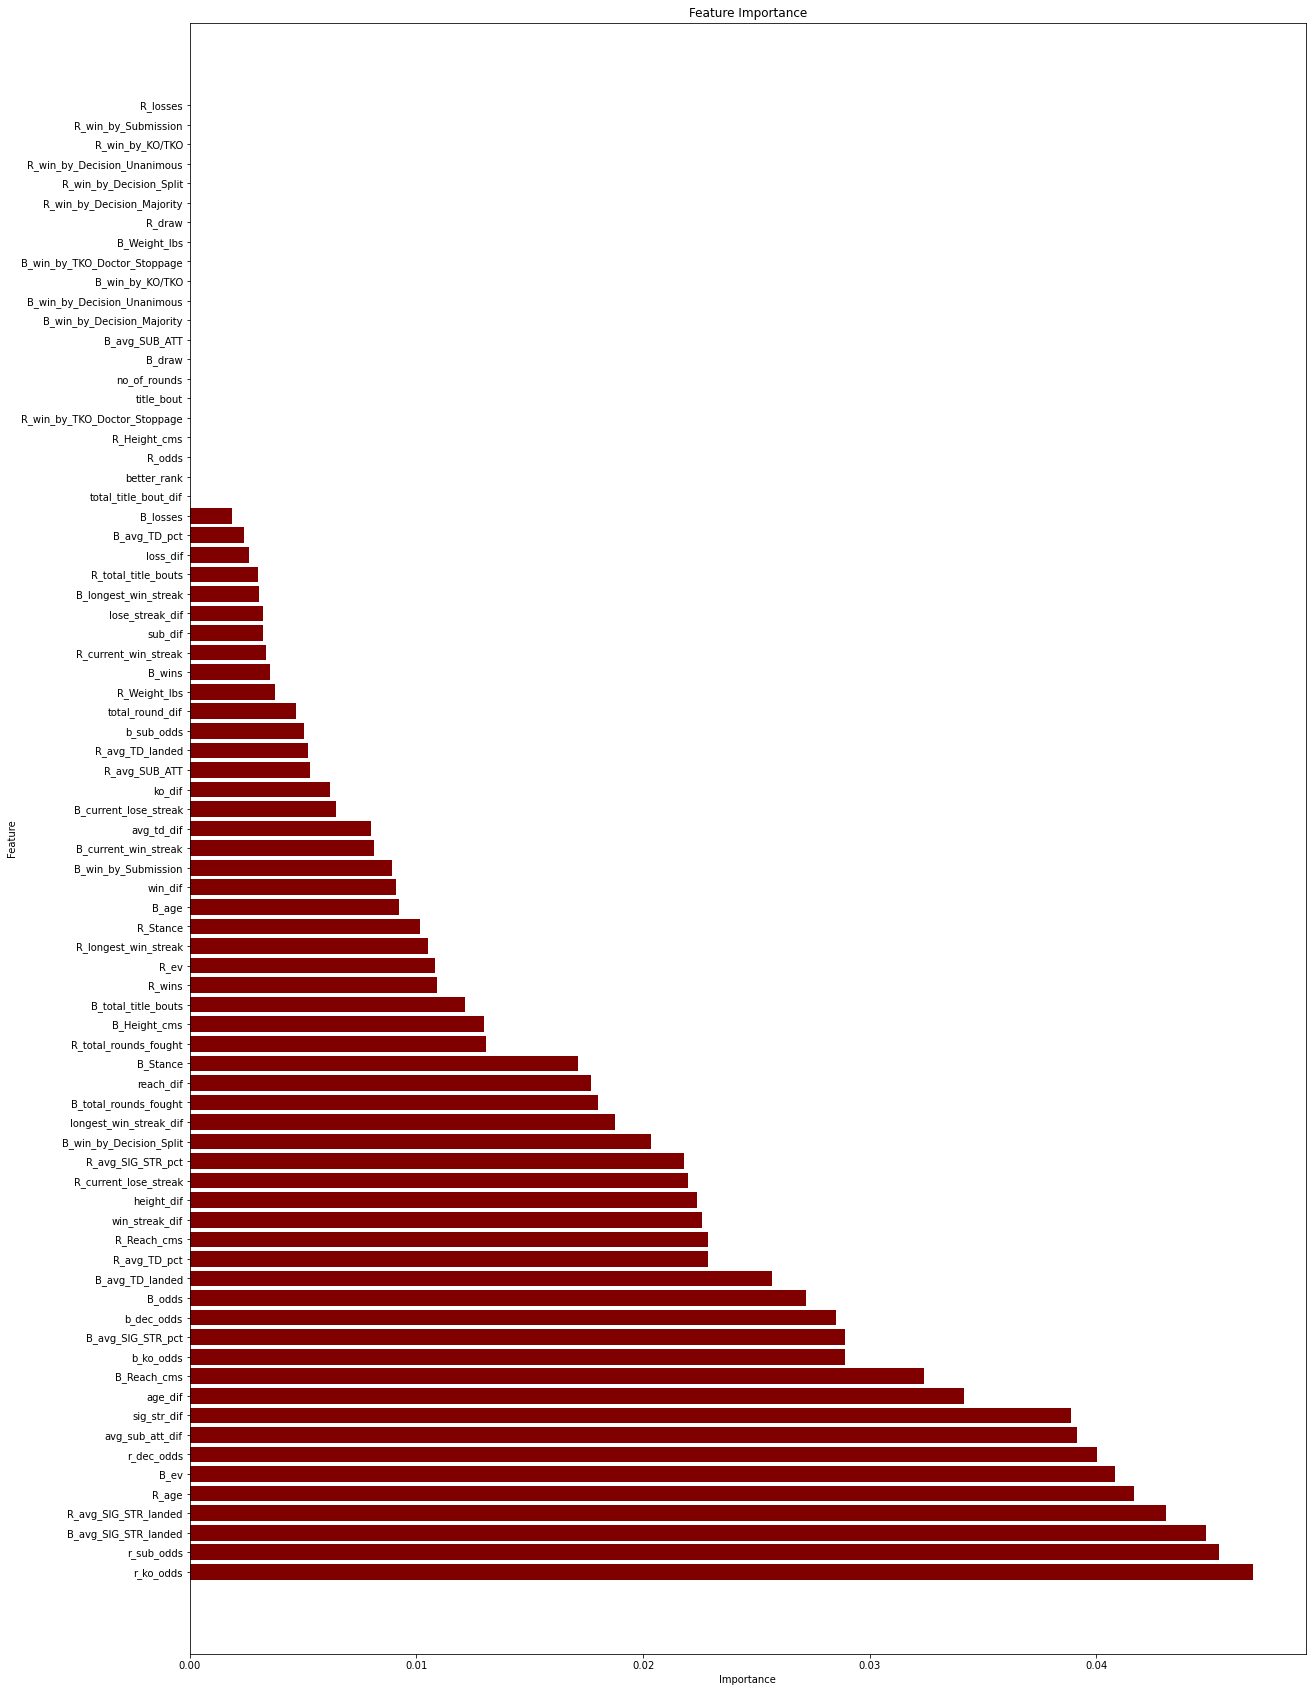

In [30]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
plt.savefig('bantamweight_boosting_plot.png')

<Figure size 432x288 with 0 Axes>